In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Load dataset
data = datasets.load_digits()
X = data.images.reshape((len(data.images), -1))
y = data.target


In [10]:
n_samples, n_features = X.shape
print("Số lượng mẫu dữ liệu:", n_samples)
print("Số lượng đặc trưng:", n_features)


Số lượng mẫu dữ liệu: 1797
Số lượng đặc trưng: 64


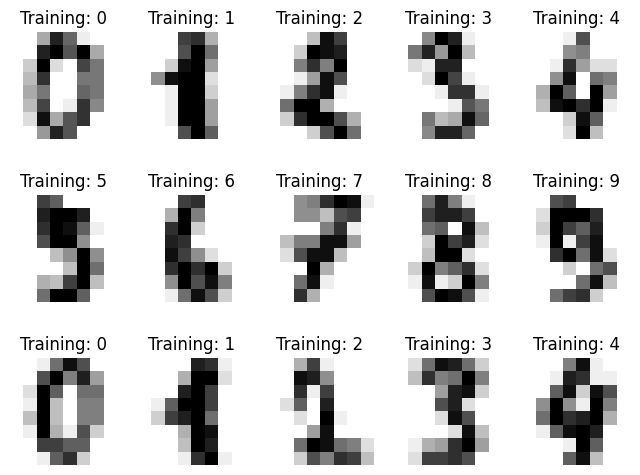

In [11]:
images_and_labels = list(zip(data.images, data.target))

# Hiển thị ảnh
plt.figure(figsize=(8, 6))
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
import joblib

# Specify the file path to save the model
model_file_path = "svm_classifier.joblib"

# Save the trained SVM classifier model to a file
joblib.dump(svm_classifier, model_file_path)

print("Model saved successfully to:", model_file_path)


Model saved successfully to: svm_classifier.joblib


In [16]:
# Predict test set
y_pred = svm_classifier.predict(X_test)

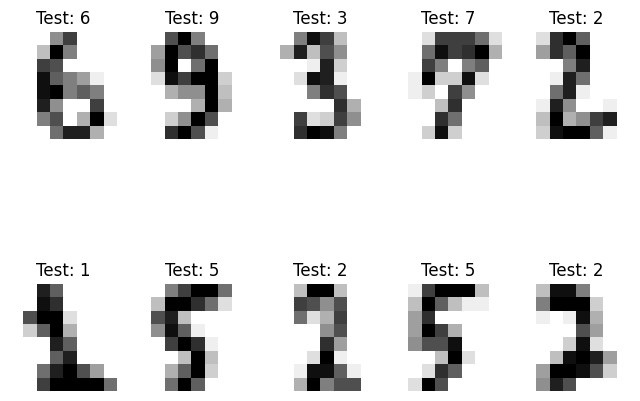

In [17]:
# Display images from X_test
plt.figure(figsize=(8, 6))
for i in range(10):  # Displaying the first 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Test: {y_test[i]}")
    plt.axis('off')
plt.show()

In [18]:
# Print the first 10 predictions
print("First 10 predictions:", y_pred[:10])

First 10 predictions: [6 9 3 7 2 1 5 2 5 2]


In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [21]:
import joblib
import numpy as np
from PIL import Image
import cv2
from tensorflow.keras.models import load_model


In [33]:
import numpy as np
from PIL import Image
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from google.colab import files


def showimg(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 10))

    plt.subplot(3, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Ảnh gốc")
    plt.axis('off')
    plt.show()

    image = cv2.bitwise_not(image)
    resized_image = cv2.resize(image, (28, 28))
    preprocessed_image = resized_image.reshape((1, 28, 28, 1)) / 255.0
    plt.figure(figsize=(10, 10))

    plt.subplot(3, 3, 3)
    plt.imshow(resized_image, cmap='gray')
    plt.title("Ảnh qua xử lý")
    plt.axis('off')
    plt.show()


# Function to preprocess input image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)



    image = cv2.bitwise_not(image)
    resized_image = cv2.resize(image, (28, 28))
    preprocessed_image = resized_image.reshape((1, 28, 28, 1)) / 255.0
    return preprocessed_image

def predict_digit(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to match the input size of the model
    resized = cv2.resize(gray, (8, 8), interpolation=cv2.INTER_AREA)
    # Flatten the image array
    flattened = resized.flatten().reshape(1, -1)
    # Normalize the pixel values to be between 0 and 1
    normalized = flattened / 255.0
    # Predict using the loaded model
    prediction = loaded_svm_model.predict(normalized)
    # Return the predicted digit
    return prediction[0]


Saving csvt06.jpg to csvt06.jpg


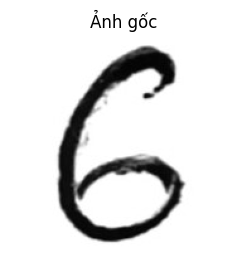

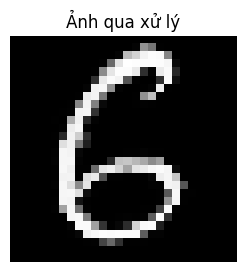

Dự đoán: 4


In [41]:
# Get the path of the uploaded image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load pre-trained model
loaded_svm_model  = joblib.load('svm_classifier.joblib')

# Predict digit from the uploaded image
showimg(image_path)
predicted_digit = predict_digit(image_path)
print("Dự đoán:", predicted_digit)
